In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder ,OrdinalEncoder, StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [18]:
df = pd.read_csv("train.csv")

In [19]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [21]:
df.shape # rows and columns

(137, 43)

In [22]:
df = df.drop(columns=["Open Date"])

In [23]:
x=df.drop("revenue",axis=1)
y=df.revenue

In [24]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,train_size=0.8,random_state=42)

In [25]:
num_cols = xtrain.select_dtypes(include='number').columns
cat_cols = xtrain.select_dtypes(exclude='number').columns

In [26]:
def cat_cols_nunique(cols):
    for col in cols:
        print(f'{col} - {df[col].nunique()}')

cat_cols_nunique(cat_cols)

City - 34
City Group - 2
Type - 3


<Axes: >

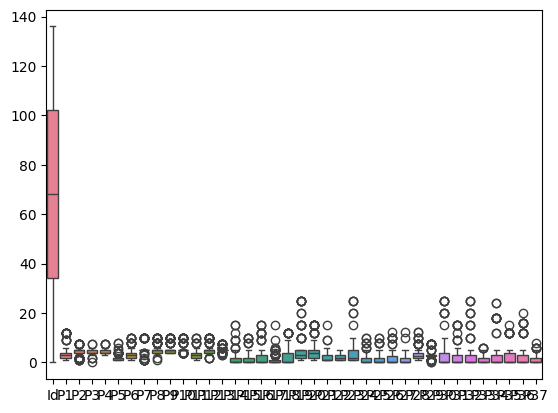

In [27]:
sns.boxplot(df[num_cols])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
preprocessing = ColumnTransformer(
    transformers= [
        ('scaler',RobustScaler(),num_cols),
        ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),["City"]),
    ]
)

In [29]:
pipeline = Pipeline (
    steps = [
        ('preprocessing',preprocessing),
        ('model',DecisionTreeRegressor())
    ]
)

In [30]:
pipeline.fit(xtrain,ytrain)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('ordinal', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
pipeline.score(xtrain,ytrain)

1.0

In [32]:
pipeline.score(xtest,ytest)

0.004767608385033761